In [353]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import confusion_matrix, roc_curve, auc

import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [354]:
dataset = pd.read_csv('wine.csv')
dataset

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,bad
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,bad
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,bad
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,good
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,bad
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,bad
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,good
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,good
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,bad


In [355]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   object 
dtypes: float64(11), object(1)
memory usage: 150.0+ KB


In [356]:
# Вибір числових колонок
numeric_columns = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
                   'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
                   'pH', 'sulphates', 'alcohol']

# Перевірка некоректних значень
invalid_values = dataset[numeric_columns].lt(0).any(axis=1)
invalid_records = dataset[invalid_values]

if len(invalid_records) > 0:
    print("Знайдені некоректні значення:")
    print(invalid_records)
else:
    print("Некоректні значення відсутні.")

Некоректні значення відсутні.


In [357]:
# Обчислити Z-оцінку для кожного стовпця
z_scores = (dataset[numeric_columns] - dataset[numeric_columns].mean()) / dataset[numeric_columns].std()

# Поріг для викидів (4 стандартних відхилення)
threshold = 4

# Виявити викиди за допомогою Z-оцінки
outliers = (np.abs(z_scores) > threshold).any(axis=1)

outlier_records = dataset[outliers]
dataset = dataset[~outliers]
outlier_records

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
13,7.8,0.610,0.29,1.6,0.114,9.0,29.0,0.99740,3.26,1.56,9.1,bad
17,8.1,0.560,0.28,1.7,0.368,16.0,56.0,0.99680,3.11,1.28,9.3,bad
19,7.9,0.320,0.51,1.8,0.341,17.0,56.0,0.99690,3.04,1.08,9.2,good
33,6.9,0.605,0.12,10.7,0.073,40.0,83.0,0.99930,3.45,0.52,9.4,good
42,7.5,0.490,0.20,2.6,0.332,8.0,14.0,0.99680,3.21,0.90,10.5,good
...,...,...,...,...,...,...,...,...,...,...,...,...
1435,10.2,0.540,0.37,15.4,0.214,55.0,95.0,1.00369,3.18,0.77,9.0,good
1474,9.9,0.500,0.50,13.8,0.205,48.0,82.0,1.00242,3.16,0.75,8.8,bad
1476,9.9,0.500,0.50,13.8,0.205,48.0,82.0,1.00242,3.16,0.75,8.8,bad
1558,6.9,0.630,0.33,6.7,0.235,66.0,115.0,0.99787,3.22,0.56,9.5,bad


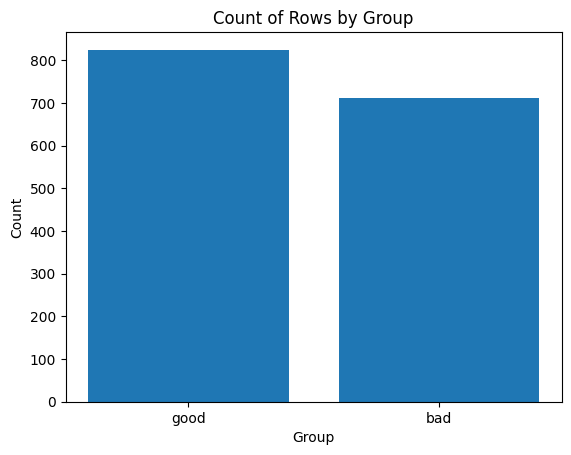

In [358]:
# Візуалізація розподілення записів за групами
quality_counts = dataset['quality'].value_counts()
plt.bar(quality_counts.index, quality_counts.values)
plt.xlabel('Group')
plt.ylabel('Count')
plt.title('Count of Rows by Group')
plt.show()

In [359]:
# Нормалізація та стандартизація числових змінних
scaler = StandardScaler()
dataset.loc[:, numeric_columns] = scaler.fit_transform(dataset[numeric_columns])

# Кодування вихідної змінної
label_encoder = LabelEncoder()
dataset['quality'] = label_encoder.fit_transform(dataset['quality'])
dataset

C:\Users\vines\AppData\Local\Temp\ipykernel_13896\401116269.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['quality'] = label_encoder.fit_transform(dataset['quality'])


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,-0.528900,0.984482,-1.388852,-0.548723,-0.258869,-0.462257,-0.366903,0.601501,1.312605,-0.629182,-0.977099,0
1,-0.294003,2.010249,-1.388852,0.180896,0.619546,0.936541,0.686694,0.055180,-0.794169,0.249025,-0.599584,0
2,-0.294003,1.326404,-1.179591,-0.131798,0.379978,-0.062601,0.271641,0.164444,-0.386406,0.029474,-0.599584,0
3,1.702622,-1.408974,1.540793,-0.548723,-0.298797,0.137228,0.463204,0.710766,-1.066011,-0.482814,-0.599584,1
4,-0.528900,0.984482,-1.388852,-0.548723,-0.258869,-0.462257,-0.366903,0.601501,1.312605,-0.629182,-0.977099,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,-1.233592,0.414611,-0.970331,-0.444492,0.300122,1.635940,-0.047631,-0.982832,0.904842,-0.482814,0.061067,0
1595,-1.409764,0.129676,-0.865701,-0.236029,-0.817861,2.335340,0.175859,-0.862641,1.380565,0.834497,0.721717,1
1596,-1.174867,-0.098272,-0.708755,-0.131798,-0.258869,1.336198,-0.175340,-0.523922,0.700961,0.761313,0.532960,1
1597,-1.409764,0.671053,-0.761071,-0.444492,-0.298797,1.635940,-0.047631,-0.671428,1.720368,0.468577,-0.222069,0


In [360]:
# Дослідження кореляцій
dataset.corr()['quality']

fixed acidity           0.111992
volatile acidity       -0.323420
citric acid             0.174542
residual sugar         -0.033686
chlorides              -0.106111
free sulfur dioxide    -0.068820
total sulfur dioxide   -0.263808
density                -0.161378
pH                     -0.018510
sulphates               0.305681
alcohol                 0.446552
quality                 1.000000
Name: quality, dtype: float64

In [361]:
# Розділення датасету на вхідні змінні та вихідну змінну
X = dataset.drop('quality', axis=1)
y = dataset['quality']

# Розділення датасету на тренувальний та тестувальний набори даних
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## Logistic Regression

In [362]:
# Створення та навчання моделі логістичної регресії
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

test_acc = log_reg.score(X_test, y_test)
print("Test accuracy: ", test_acc)

train_acc = log_reg.score(X_train, y_train)
print("Train accuracy: ", train_acc)

Test accuracy:  0.7467532467532467
Train accuracy:  0.758340113913751


## Decisions tree

In [363]:
# Створення та навчання моделі дерева рішень
dec_tree = DecisionTreeClassifier()
dec_tree.fit(X_train, y_train)


test_acc = dec_tree.score(X_test, y_test)
print("Test accuracy: ", test_acc)

train_acc = dec_tree.score(X_train, y_train)
print("Train accuracy: ", train_acc)

Test accuracy:  0.7207792207792207
Train accuracy:  1.0


## Random forest

In [367]:
# Створення та навчання моделі дерева рішень
rand_forest = RandomForestClassifier()
rand_forest.fit(X_train, y_train)


test_acc = rand_forest.score(X_test, y_test)
print("Test accuracy: ", test_acc)

train_acc = rand_forest.score(X_train, y_train)
print("Train accuracy: ", train_acc)

Test accuracy:  0.7824675324675324
Train accuracy:  1.0


# Visualisation

In [365]:
# Графік ROC
def plot_roc_curve(name, y_true, y_scores):
    fpr, tpr, _ = roc_curve(y_true, y_scores)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'Receiver Operating Characteristic for {name}')
    plt.legend(loc="lower right")
    plt.show()

def plot_conf_matrix(model, name, class_labels):
    cm = confusion_matrix(y_true=y_test, y_pred=model.predict(X_test))
    confusion_df = pd.DataFrame(cm, index=class_labels, columns=class_labels)
    sns.heatmap(confusion_df, annot=True, fmt='d', cmap="Blues")
    plt.title(f'Confusion Matrix for {name}')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

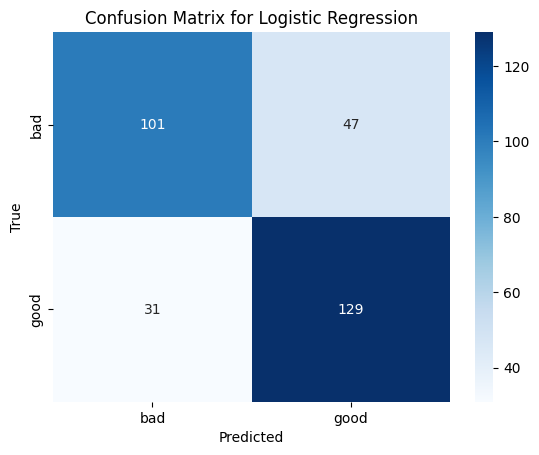

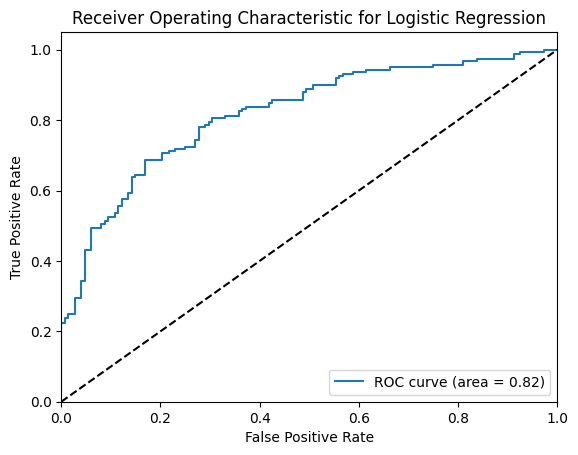

Classification report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.77      0.68      0.72       148
           1       0.73      0.81      0.77       160

    accuracy                           0.75       308
   macro avg       0.75      0.74      0.74       308
weighted avg       0.75      0.75      0.75       308



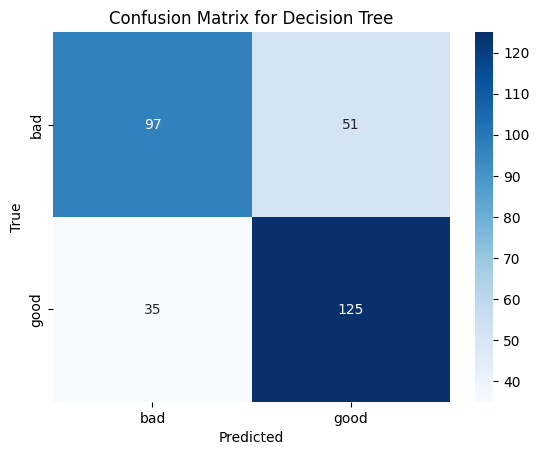

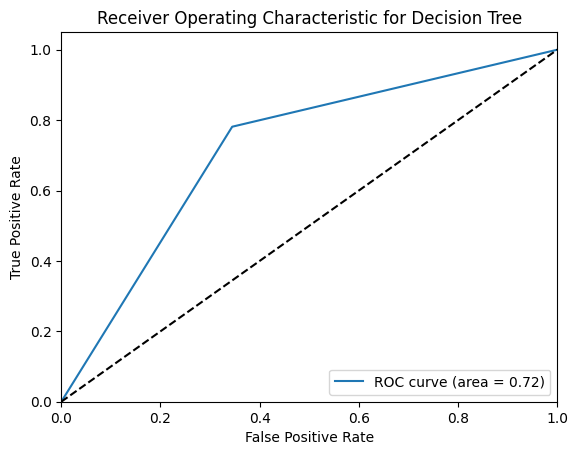

Classification report for Decision Tree:
              precision    recall  f1-score   support

           0       0.73      0.66      0.69       148
           1       0.71      0.78      0.74       160

    accuracy                           0.72       308
   macro avg       0.72      0.72      0.72       308
weighted avg       0.72      0.72      0.72       308



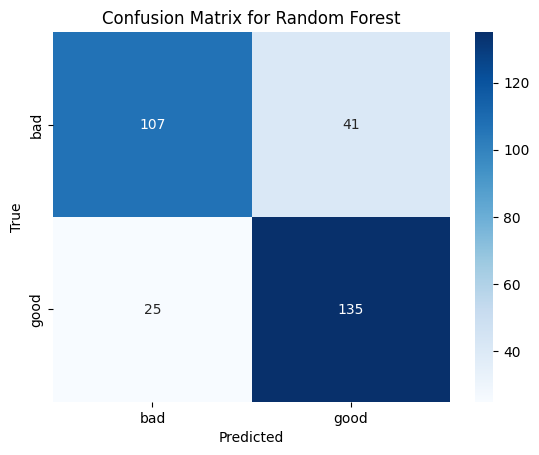

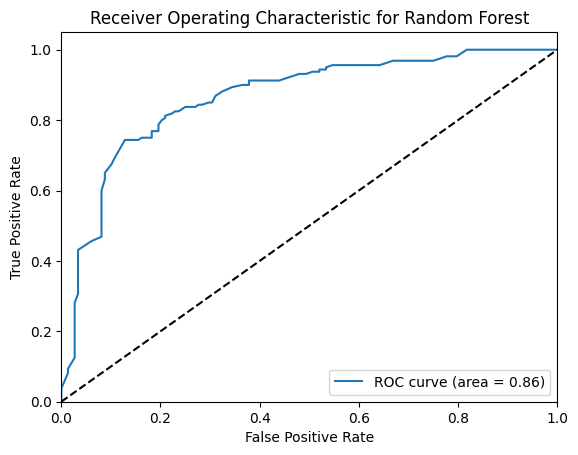

Classification report for Random Forest:
              precision    recall  f1-score   support

           0       0.81      0.72      0.76       148
           1       0.77      0.84      0.80       160

    accuracy                           0.79       308
   macro avg       0.79      0.78      0.78       308
weighted avg       0.79      0.79      0.78       308



In [366]:
models = [log_reg, dec_tree, rand_forest]
names = ['Logistic Regression', 'Decision Tree', 'Random Forest']

for model, name in zip(models, names):

    plot_conf_matrix(model, name, ['bad', 'good'])

    plot_roc_curve(name, y_test, model.predict_proba(X_test)[:, 1])

    report = classification_report(y_test, model.predict(X_test))
    print(f'Classification report for {name}:', report, sep='\n')